# K-NEAREST NEIGHBOURS

In [ ]:
# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid', palette='rainbow')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Read the Data

In [2]:
df=pd.read_csv(r'C:\Users\sanket\Desktop\DS ASSIGNMENT\New folder\KNN\KNN\Zoo.csv')

In [3]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
df.drop(columns=['animal name'],inplace=True)

In [5]:
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [6]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [ ]:
# check for duplicates

In [12]:
df.duplicated()

0      False
1      False
2      False
3       True
4      False
       ...  
96     False
97     False
98      True
99      True
100     True
Length: 101, dtype: bool

In [13]:
df.duplicated().sum()

42

In [ ]:
# remove duplicate values

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
len(df)

59

In [ ]:
# check for missing value

In [17]:
df.isna().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [ ]:
# scaling the data

In [18]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1


In [20]:
x = df.iloc[:,:-1]
y = df['type']

In [21]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [22]:
x

array([[ 1.34518542, -0.50529115, -1.396424  ,  1.4509525 , -0.55777335,
        -0.82807867,  0.85749293,  0.95038193,  0.55777335,  0.50529115,
        -0.39605902, -0.39605902,  0.51558082, -1.34518542, -0.39605902,
         1.25108648],
       [ 1.34518542, -0.50529115, -1.396424  ,  1.4509525 , -0.55777335,
        -0.82807867, -1.16619038,  0.95038193,  0.55777335,  0.50529115,
        -0.39605902, -0.39605902,  0.51558082,  0.74339194, -0.39605902,
         1.25108648],
       [-0.74339194, -0.50529115,  0.71611487, -0.68920244, -0.55777335,
         1.20761473,  0.85749293,  0.95038193,  0.55777335, -1.97905701,
        -0.39605902,  2.52487623, -1.35637416,  0.74339194, -0.39605902,
        -0.79930525],
       [ 1.34518542, -0.50529115, -1.396424  ,  1.4509525 , -0.55777335,
        -0.82807867,  0.85749293,  0.95038193,  0.55777335,  0.50529115,
        -0.39605902, -0.39605902,  0.51558082,  0.74339194, -0.39605902,
         1.25108648],
       [ 1.34518542, -0.50529115, -1

In [ ]:
# split the data into training and testing sets

In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [24]:
xtrain

array([[-0.74339194,  1.97905701,  0.71611487, -0.68920244, -0.55777335,
        -0.82807867, -1.16619038, -1.05220856,  0.55777335,  0.50529115,
        -0.39605902, -0.39605902, -0.42039667,  0.74339194, -0.39605902,
         1.25108648],
       [ 1.34518542, -0.50529115, -1.396424  ,  1.4509525 , -0.55777335,
        -0.82807867,  0.85749293,  0.95038193,  0.55777335,  0.50529115,
        -0.39605902, -0.39605902,  0.51558082,  0.74339194,  2.52487623,
         1.25108648],
       [-0.74339194, -0.50529115,  0.71611487, -0.68920244, -0.55777335,
         1.20761473, -1.16619038,  0.95038193,  0.55777335, -1.97905701,
        -0.39605902,  2.52487623, -1.35637416,  0.74339194, -0.39605902,
        -0.79930525],
       [-0.74339194, -0.50529115,  0.71611487, -0.68920244, -0.55777335,
         1.20761473,  0.85749293, -1.05220856, -1.79284291, -1.97905701,
        -0.39605902, -0.39605902,  1.45155831, -1.34518542, -0.39605902,
        -0.79930525],
       [-0.74339194, -0.50529115,  0

In [25]:
xtest

array([[ 1.34518542, -0.50529115, -1.396424  ,  1.4509525 , -0.55777335,
        -0.82807867, -1.16619038,  0.95038193,  0.55777335,  0.50529115,
        -0.39605902, -0.39605902, -0.42039667,  0.74339194, -0.39605902,
        -0.79930525],
       [-0.74339194, -0.50529115,  0.71611487, -0.68920244, -0.55777335,
         1.20761473,  0.85749293,  0.95038193,  0.55777335, -1.97905701,
        -0.39605902,  2.52487623, -1.35637416,  0.74339194, -0.39605902,
        -0.79930525],
       [-0.74339194, -0.50529115,  0.71611487, -0.68920244, -0.55777335,
         1.20761473,  0.85749293, -1.05220856, -1.79284291, -1.97905701,
        -0.39605902, -0.39605902,  2.38753579, -1.34518542, -0.39605902,
         1.25108648],
       [-0.74339194, -0.50529115,  0.71611487, -0.68920244, -0.55777335,
        -0.82807867,  0.85749293,  0.95038193,  0.55777335,  0.50529115,
        -0.39605902, -0.39605902, -1.35637416,  0.74339194, -0.39605902,
        -0.79930525],
       [ 1.34518542, -0.50529115,  0

In [26]:
ytrain

56    2
68    1
34    4
15    7
86    4
36    1
91    3
42    6
71    2
81    7
39    6
77    7
96    1
43    2
19    1
32    1
85    7
48    1
25    5
90    3
49    1
33    2
6     1
21    2
41    2
40    6
89    5
72    7
26    5
97    6
29    1
35    1
9     1
76    3
11    2
95    2
1     1
24    6
0     1
23    2
7     4
16    2
14    7
13    7
18    4
74    1
58    2
Name: type, dtype: int64

In [27]:
ytest

84    1
2     4
53    7
80    3
63    1
52    5
62    3
27    1
30    6
87    2
75    1
4     1
Name: type, dtype: int64

In [ ]:
#Implement the K-Nearest Neighbours algorithm 

In [37]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
knn.score(xtrain,ytrain), knn.score(xtest,ytest)

(0.9361702127659575, 0.8333333333333334)

In [ ]:
#Hyperparameter Tuning for knn

In [29]:
train_acc = []
test_acc = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    train_acc.append(knn.score(xtrain,ytrain))
    test_acc.append(knn.score(xtest,ytest))

In [30]:
train_acc

[1.0,
 0.9361702127659575,
 0.9361702127659575,
 0.9574468085106383,
 0.9148936170212766,
 0.9148936170212766,
 0.8936170212765957,
 0.8936170212765957,
 0.8723404255319149,
 0.8297872340425532,
 0.851063829787234,
 0.8297872340425532,
 0.8085106382978723,
 0.8085106382978723,
 0.7872340425531915,
 0.7872340425531915,
 0.7659574468085106,
 0.7659574468085106,
 0.723404255319149]

In [31]:
test_acc

[0.8333333333333334,
 0.8333333333333334,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.8333333333333334,
 0.75,
 0.8333333333333334,
 0.8333333333333334,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.6666666666666666,
 0.6666666666666666,
 0.5833333333333334]

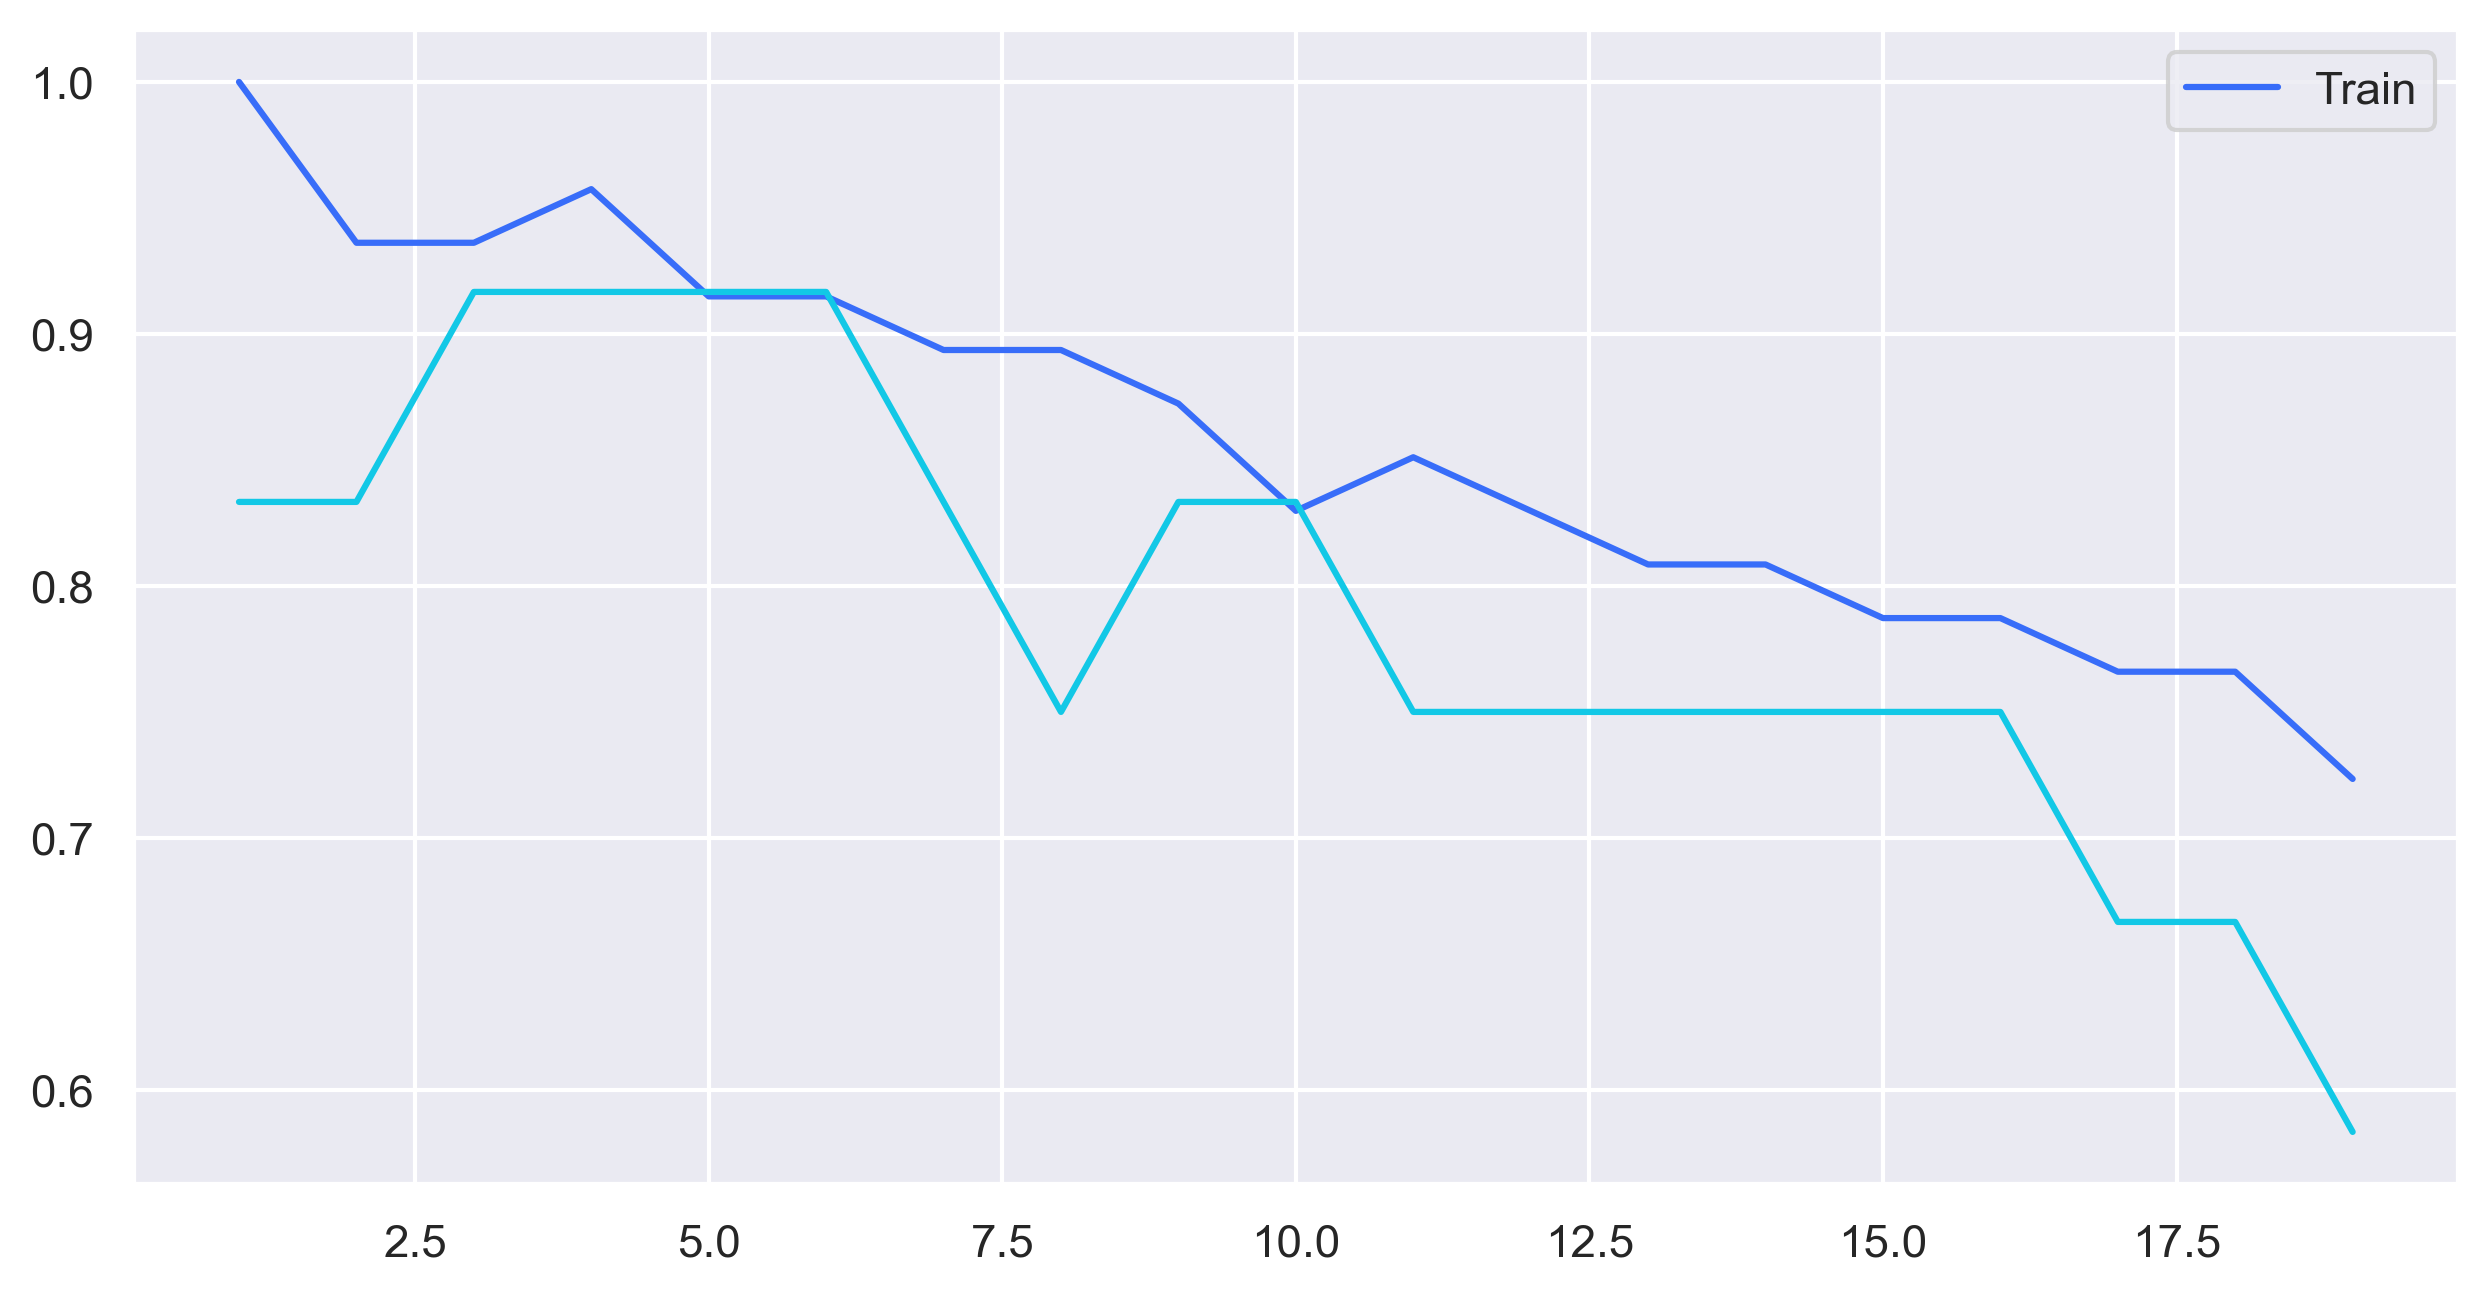

In [32]:
plt.plot(range(1,20), train_acc,label = 'Train')
plt.plot(range(1,20), test_acc)
plt.legend()

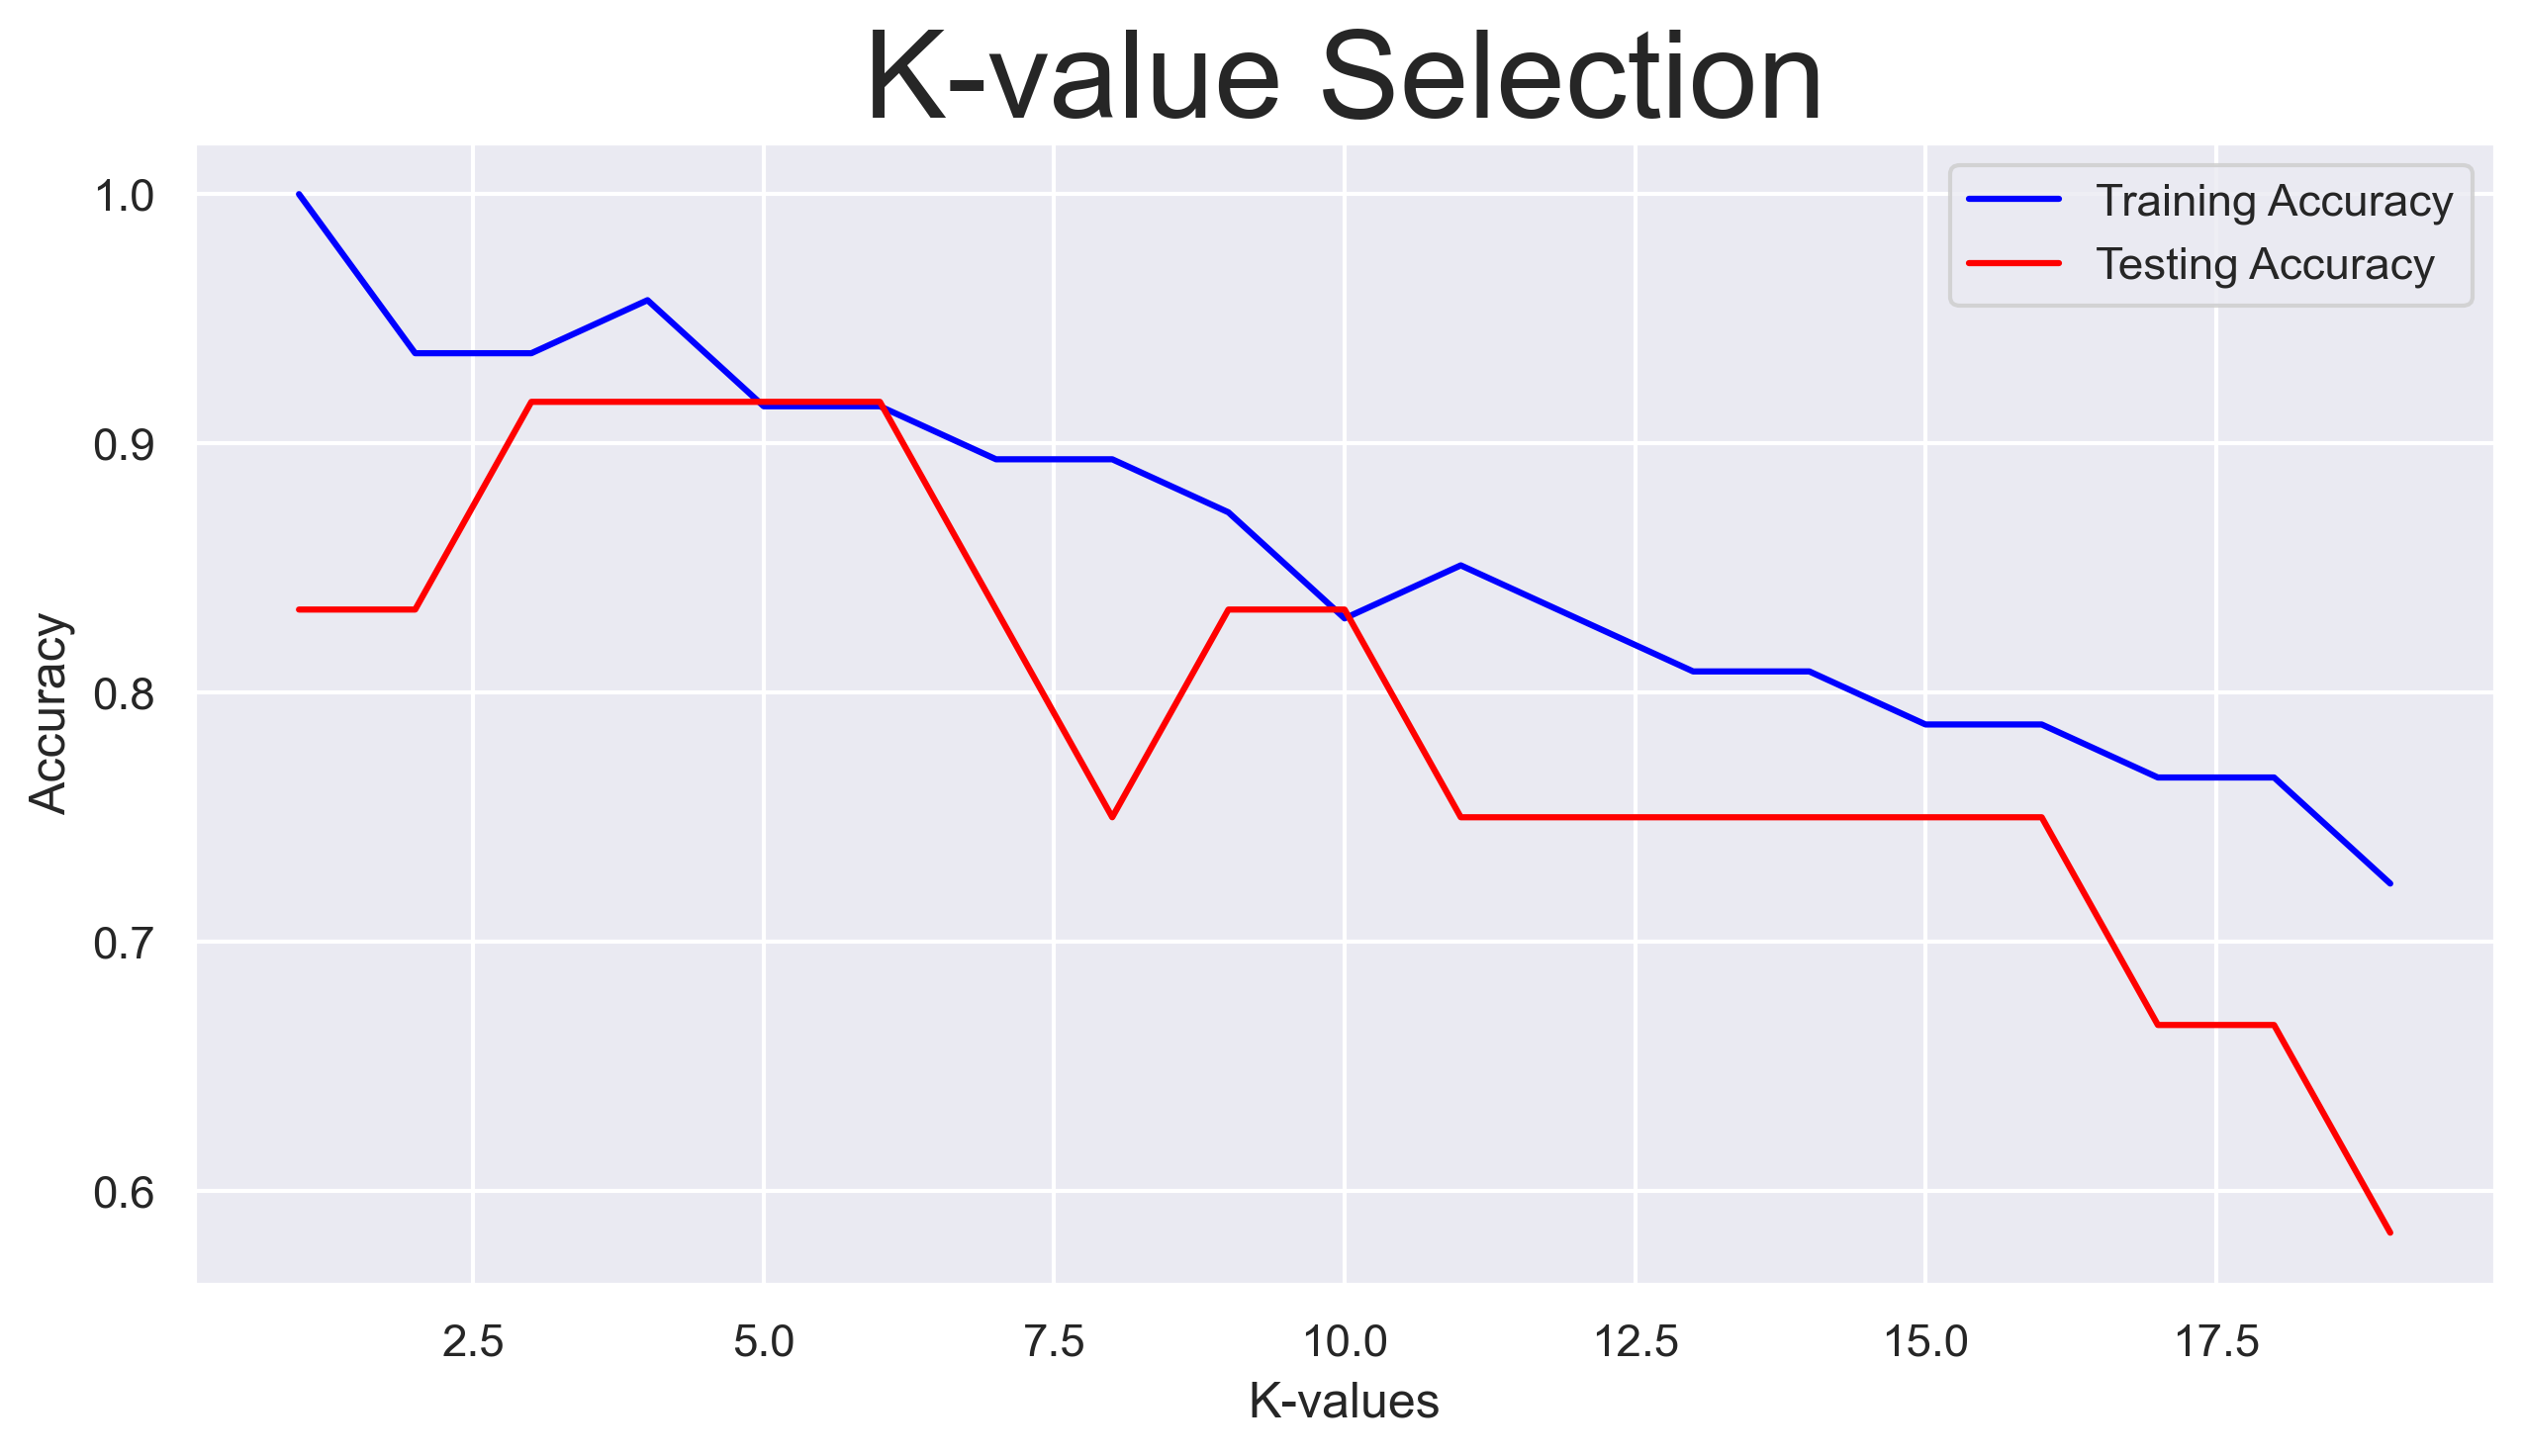

In [33]:
plt.plot(range(1,20), train_acc, color = 'blue', label = 'Training Accuracy')
plt.plot(range(1,20), test_acc, color = 'red', label = 'Testing Accuracy')
plt.xlabel('K-values')
plt.ylabel('Accuracy')
plt.title('K-value Selection', size = 30)
plt.legend()

In [38]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
knn.score(xtrain,ytrain), knn.score(xtest,ytest)

(0.9574468085106383, 0.9166666666666666)

In [ ]:
# Evaluation Metrics

In [39]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.50      1.00      0.67         1
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1

    accuracy                           0.92        12
   macro avg       0.93      0.93      0.90        12
weighted avg       0.96      0.92      0.92        12

